In [1]:
# Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import math
import random
import os
import time
from numpy import interp

# Disabling warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Apply some Styles:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]
plt.style.use('ggplot')

In [3]:
# Seeding:

def seed_all(seed):

    ''' A function to seed everything for getting stable results and reproducibility'''

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42
seed_all(seed)

x=144
y=123


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io
train = pd.read_csv("/content/drive/MyDrive/Mini Project/heart_cleveland_upload (1).csv")
print(train)

In [6]:
#Print the first "5" records
# and convert into an attractive table
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

Train data has 14 features, 297 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']



In [8]:
#Let's check for null values:
train.isnull().sum().sum()

0

In [9]:
# Further, RENAME cateorical data for easier understanding:

train['sex'] = train['sex'].map({0:'female',1:'male'})

train['cp'] = train['cp'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

train['fbs'] = train['fbs'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

train['restecg'] = train['restecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

train['exang'] = train['exang'].map({0:'no',1:'yes'})

train['slope'] = train['slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

train['thal'] = train['thal'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})


In [10]:
# Apply Masks (MASKING) for easier selection in the future:

categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [11]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):

    '''A function for displaying cateorical distribution'''

    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)

        total = float(len(df[i]))

        j.set_title(f'{str(i).capitalize()} Distribution')


        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

        plt.tight_layout()

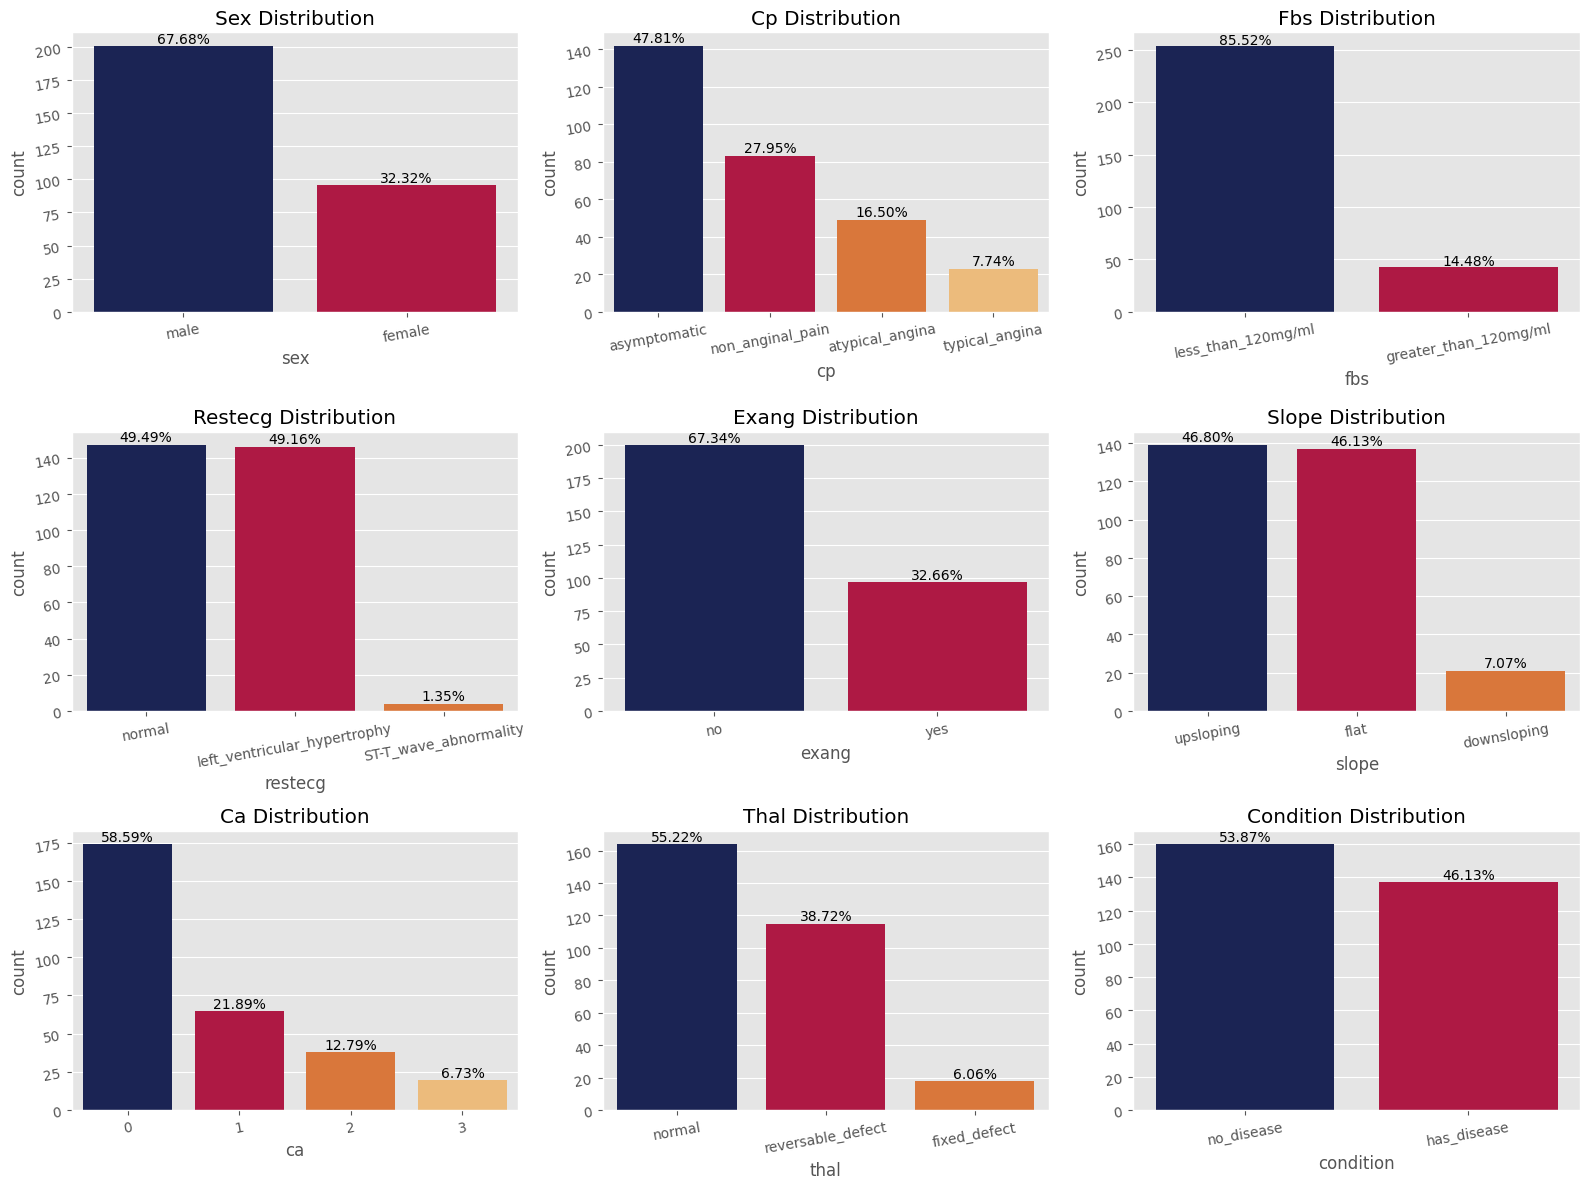

In [ ]:
# Display categorical data:

ctg_dist(train, categorical)

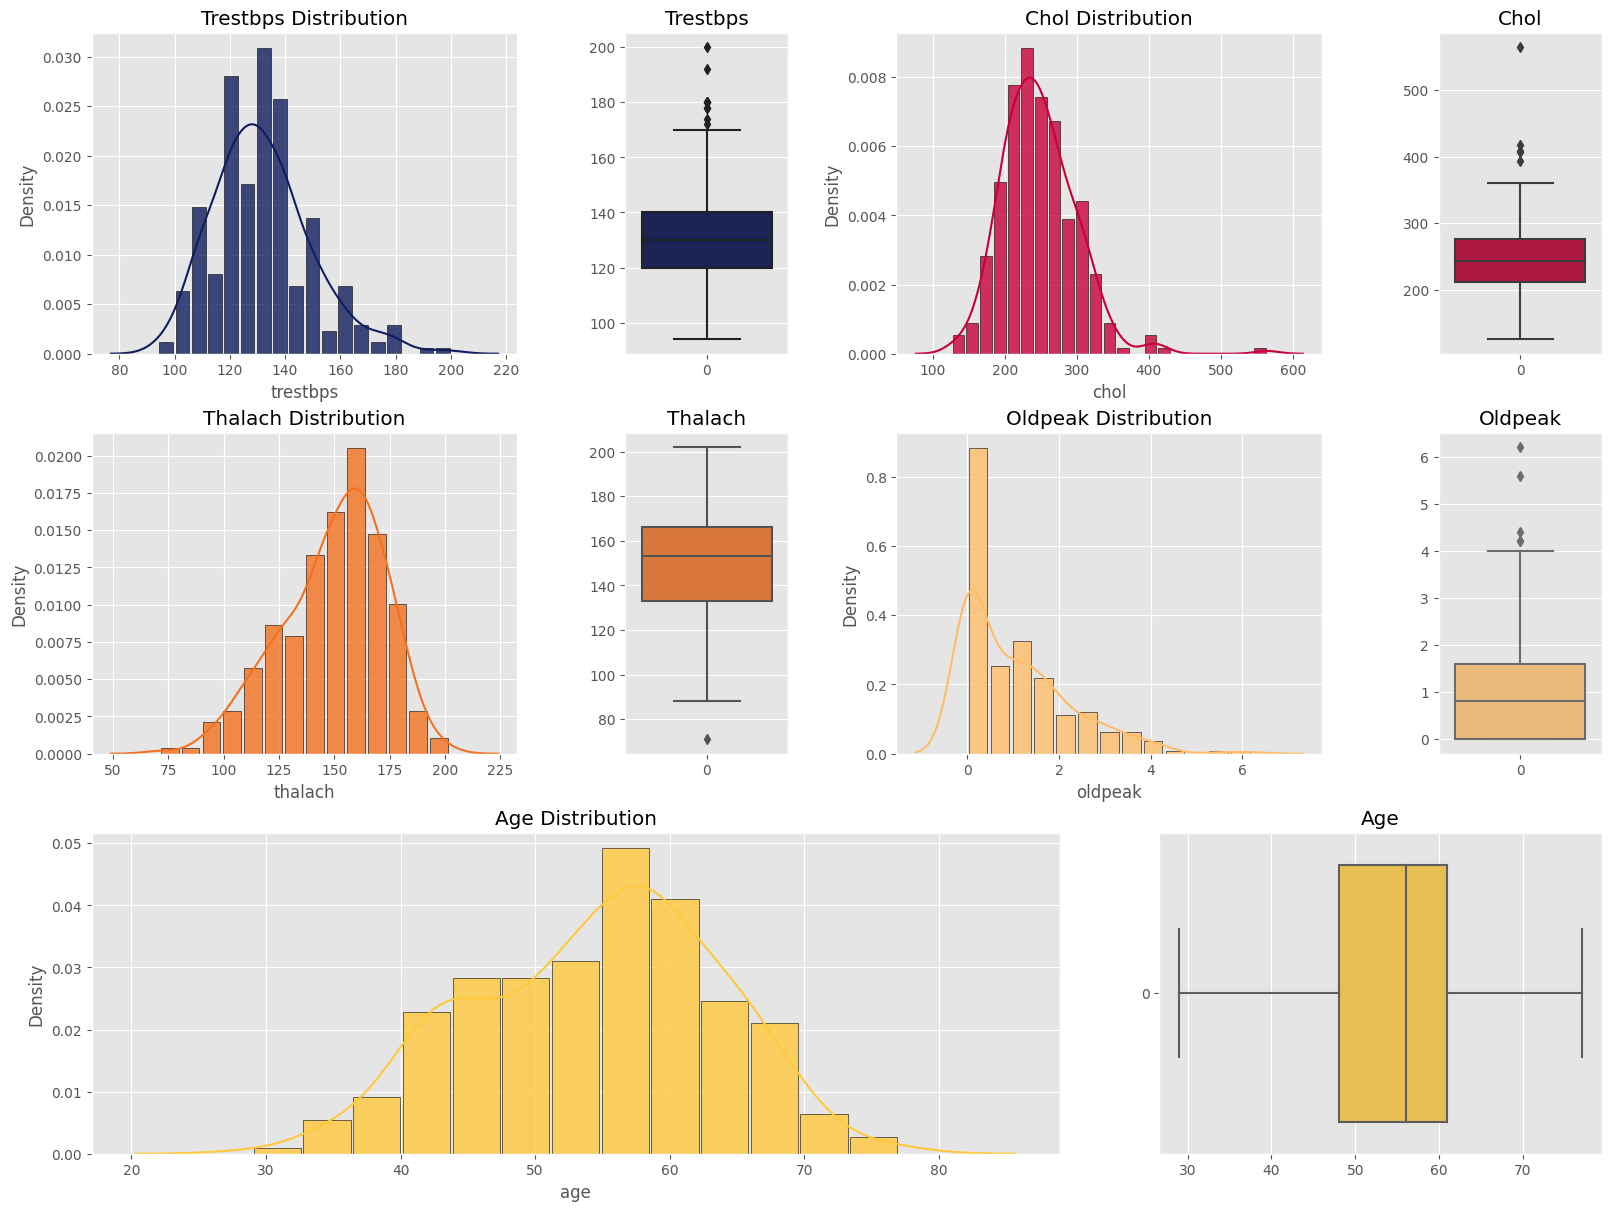

In [12]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
    #Most of the continuous variables are somehow close to a gaussian distribution with small skews (left or right) except for oldpeak.
    #Again there are some outliers espacially a strong one in Cholesterol worth taking a closer look at.


ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

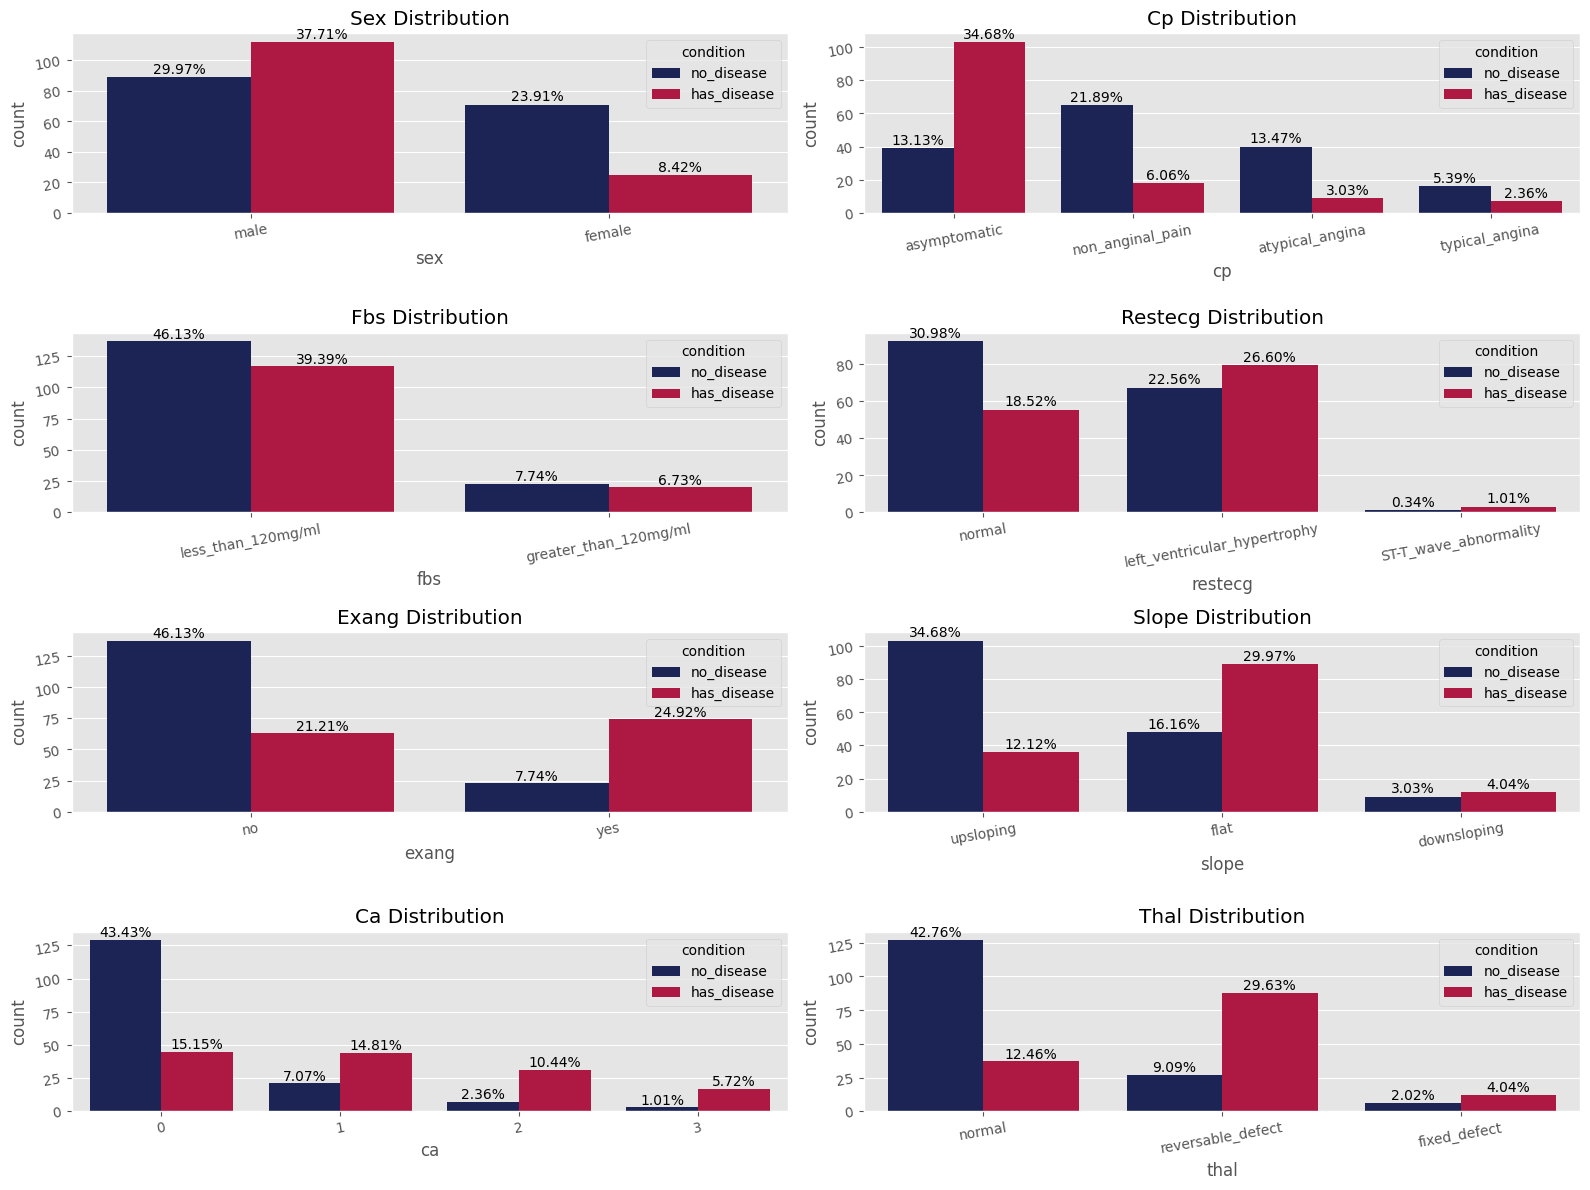

In [13]:
ctg_dist(train, categorical[:-1], 'condition', 4, 2)

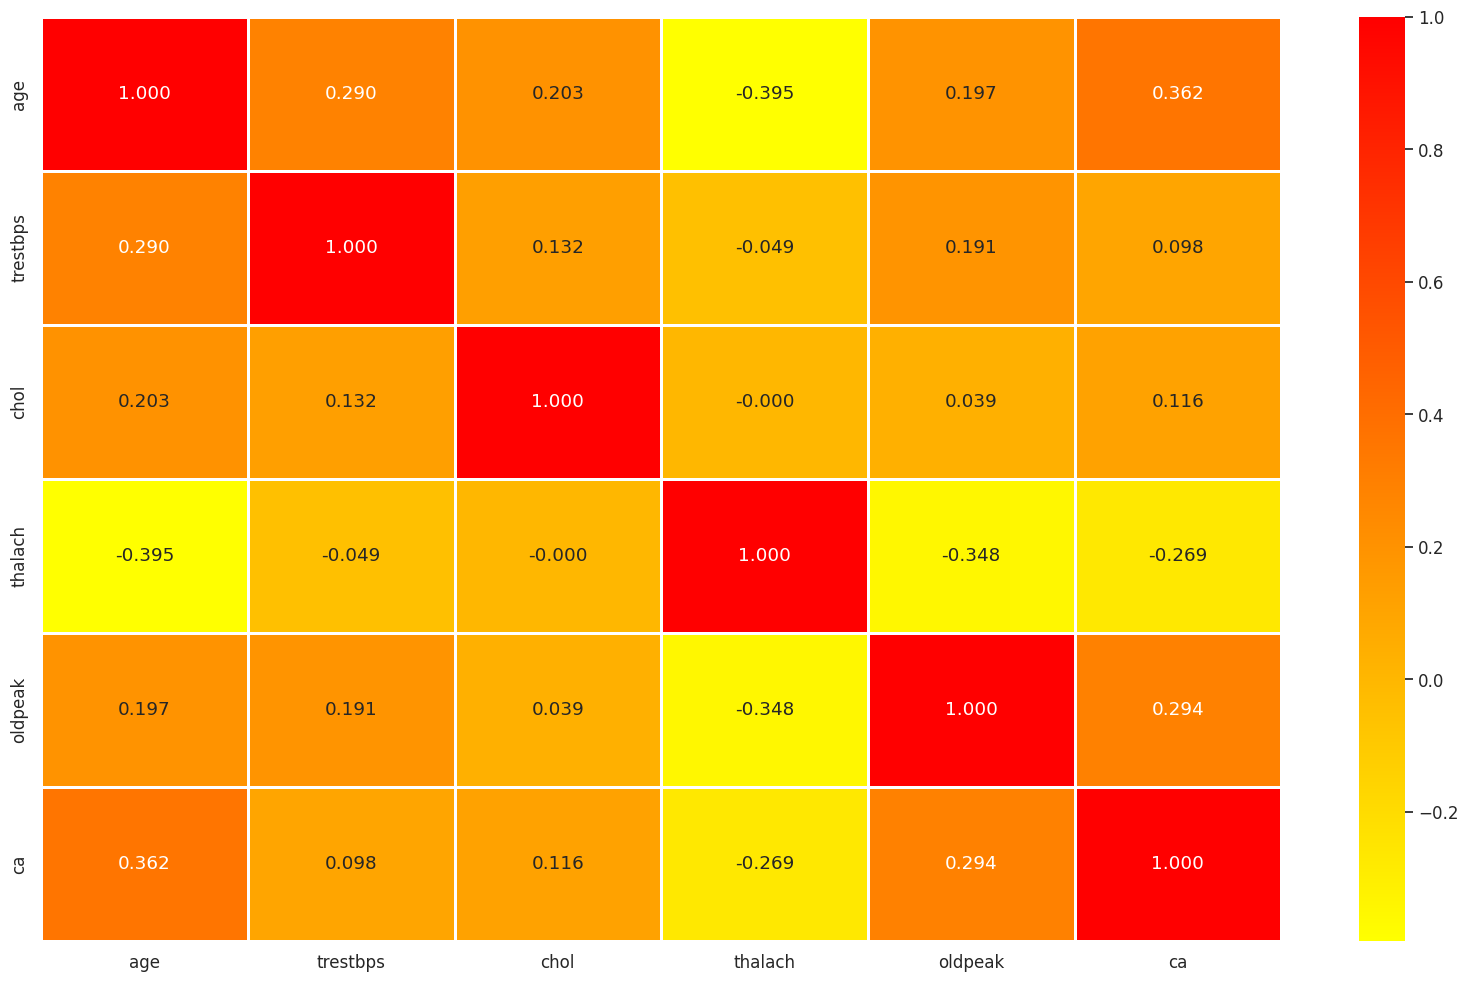

In [14]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='autumn_r',
            linewidths=1,
            cbar=True)

plt.show()

In [15]:
#First load the dataset into a new variable called "heat_train"

# Loading data for corrmap:

heat_train = pd.read_csv('/content/drive/MyDrive/Mini Project/heart_cleveland_upload (1).csv')

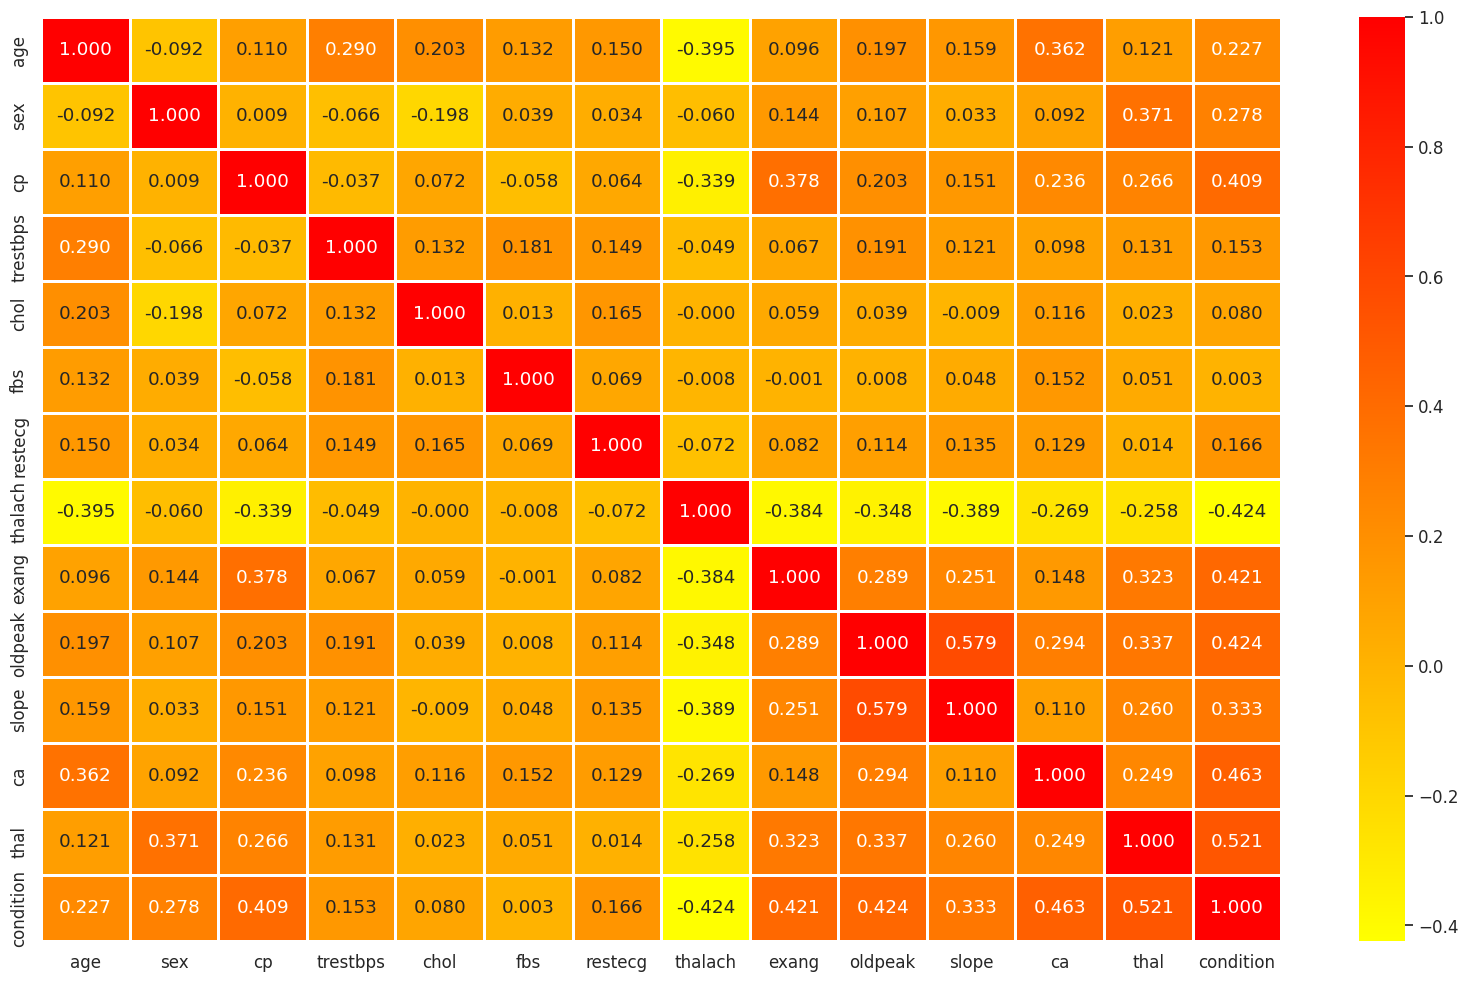

In [16]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='autumn_r',
            linewidths=1,
            cbar=True)

plt.show()

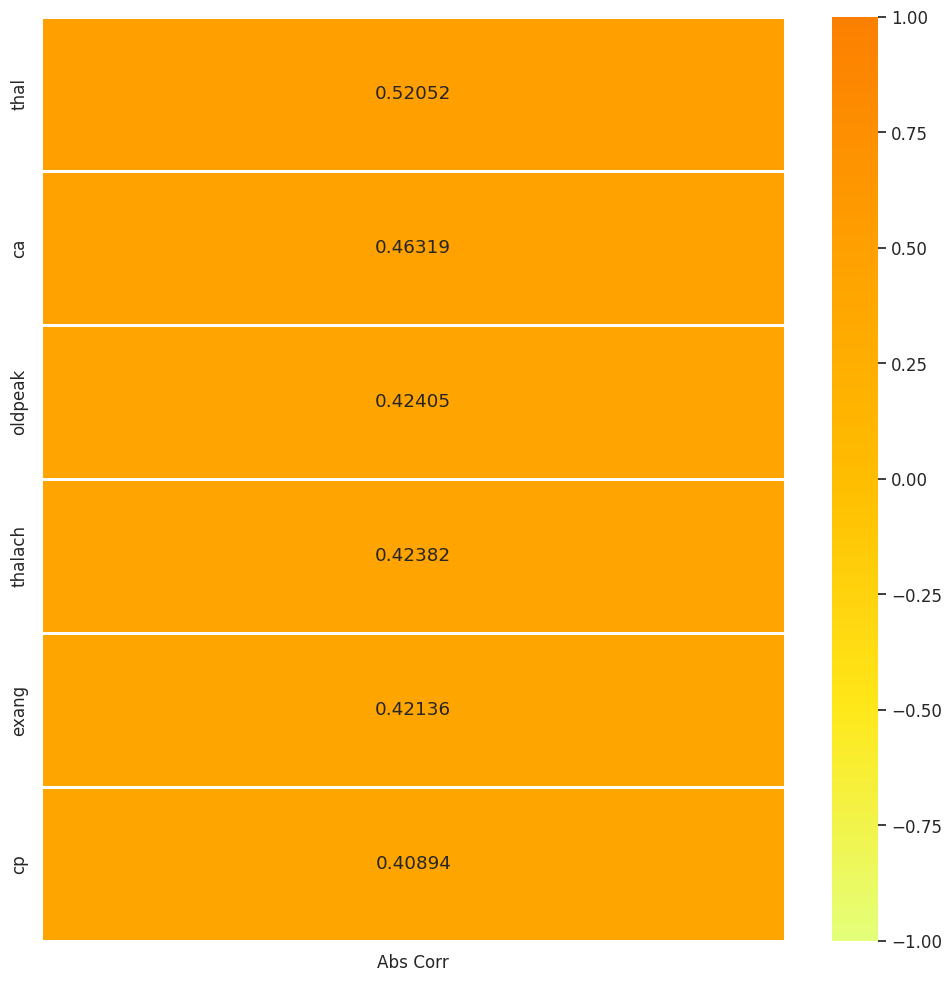

In [17]:
#orr SELECT Top celated variables:

correlations = heat_train.corrwith(heat_train['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

In [18]:
# Setting train and condition data:

X = train.drop('condition', axis=1)
y = heat_train['condition']

In [19]:
# One hot encoding train features:

ctg_df = pd.get_dummies(data=train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']])
X.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis=1, inplace=True)
X = pd.concat([X, ctg_df], axis=1)

In [20]:
# Loading sklearn packages:

from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA


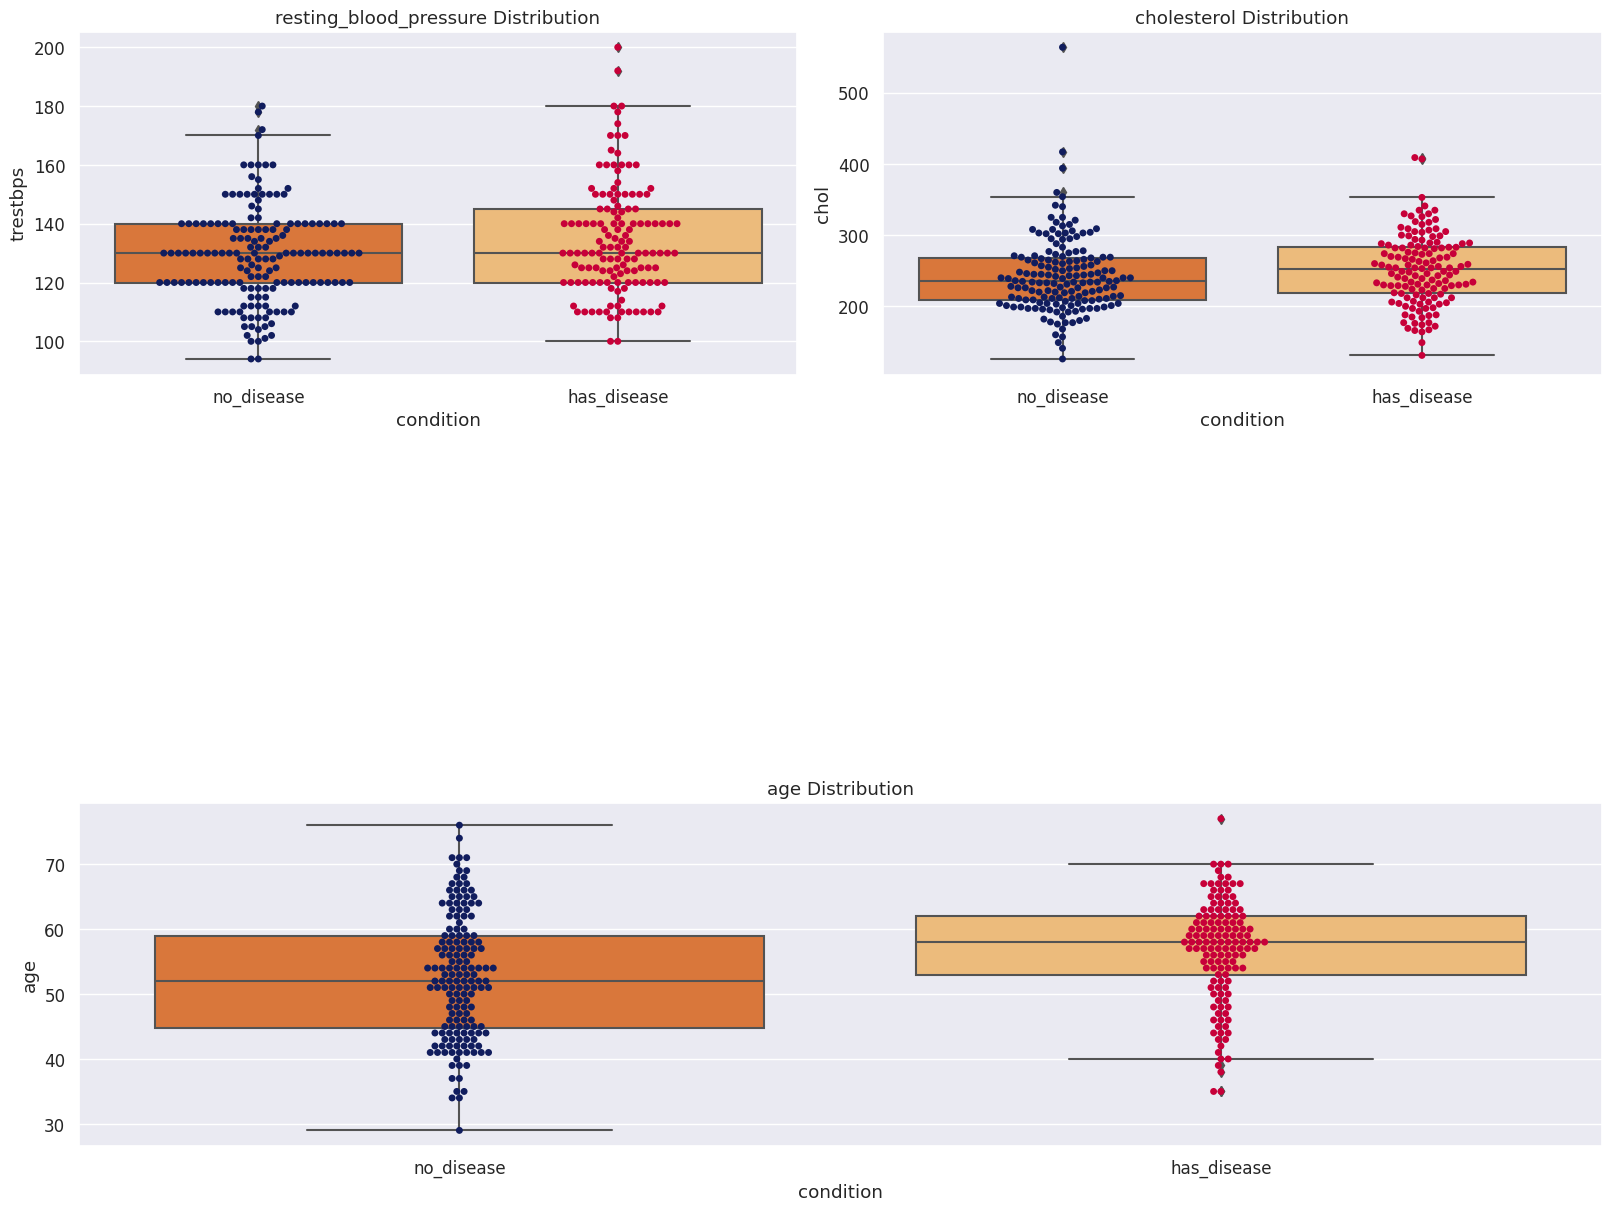

In [21]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='trestbps',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='trestbps',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='chol',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='chol',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax2)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()

In [22]:
# Selecting some classifiers:

gradclass = GradientBoostingClassifier(random_state=seed)

knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

adaclass = AdaBoostClassifier(random_state=seed)

mlpclass = MLPClassifier(random_state=seed)

gsclass = GaussianNB()

In [23]:
# Setting (K-fold) 5 fold CV:

cv = KFold(5, shuffle=True, random_state=seed)

classifiers = [gradclass, knclass, dectree, svc, randfclass, adaclass, mlpclass, gsclass]

In [24]:
def model_check(X, y, classifiers, cv):

    ''' A function for testing multiple classifiers and return various performance metrics. '''

    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [25]:
# Baseline check:

raw_models = model_check(X, y, classifiers, cv)

display(raw_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,1.000000,0.908139,0.046801,1.000000,0.831695,0.052705,1.000000,0.812917,0.056677,0.248184
6,MLPClassifier,0.943029,0.905784,0.053989,0.868705,0.818192,0.056538,0.848979,0.796519,0.059191,0.381950
0,GradientBoostingClassifier,0.999972,0.885312,0.053211,0.995791,0.814972,0.063174,0.995487,0.795906,0.062559,0.236508
7,GaussianNB,0.901929,0.893879,0.032092,0.836702,0.811695,0.052721,0.814794,0.790126,0.053867,0.004930
5,AdaBoostClassifier,0.986810,0.864971,0.064461,0.929309,0.787853,0.070837,0.922778,0.763340,0.074706,0.132508
2,DecisionTreeClassifier,1.000000,0.731797,0.050374,1.000000,0.730395,0.050089,1.000000,0.706855,0.053486,0.006188
1,KNeighborsClassifier,0.847549,0.684860,0.058935,0.770177,0.646780,0.057291,0.745321,0.593375,0.069607,0.004241
3,SVC,0.761350,0.736696,0.077651,0.678453,0.666836,0.052064,0.577783,0.562758,0.061458,0.011736


In [26]:
def f_imp(classifiers, X, y, bins):

    ''' A function for displaying important features'''

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()


NOTE:

Since our decision tree based models overfitted, I wanted to look which features mostly effected these decisions, I sampled two of the tree based models as presented below:

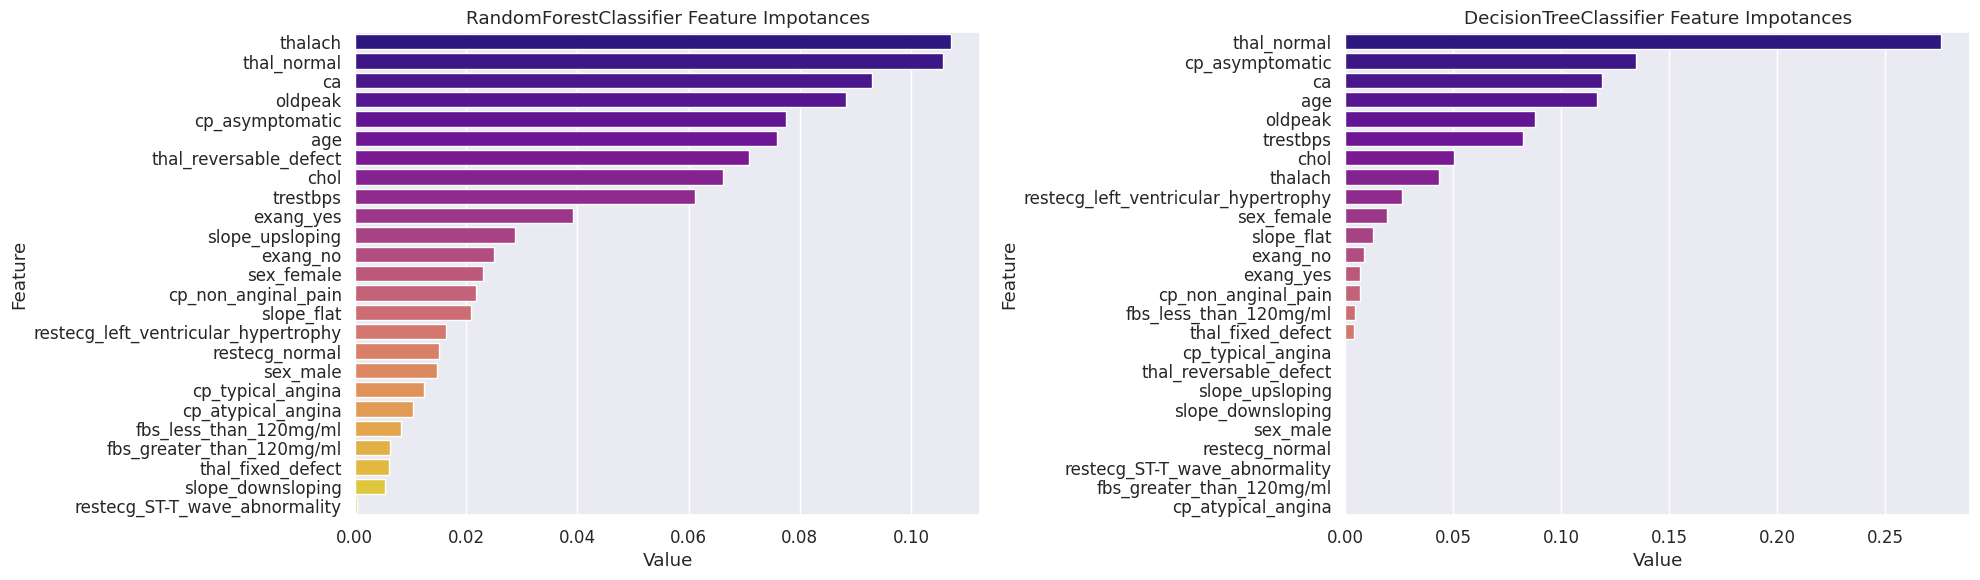

In [27]:
# Feature importances:

f_imp([randfclass,dectree], X, y, 6)

Isolation Forest:

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

Basically I set contamination rate of our data to 10% and dropped them using masks. It didn't do great on the results, we have very small dataset and removing some reduces model performances.

In [ ]:
# Applying Isolation Forest:

iso = IsolationForest(contamination=0.1,random_state=seed)
yhat = iso.fit_predict(X)

mask = (yhat != -1)

X_iso = X.loc[mask, :]
y_iso= y[mask]

In [ ]:
# Checking isolated models:

iso_models = model_check(X_iso, y_iso, classifiers, cv)
display(iso_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
7,GaussianNB,0.911465,0.878511,0.039401,0.834259,0.808945,0.043297,0.817561,0.793670,0.029050,0.007102
0,GradientBoostingClassifier,1.000000,0.881188,0.020325,0.998126,0.812718,0.012055,0.997799,0.784525,0.042853,0.165596
4,RandomForestClassifier,1.000000,0.896893,0.019932,1.000000,0.801328,0.033744,1.000000,0.766313,0.058321,0.246283
6,MLPClassifier,0.929163,0.880803,0.011143,0.833338,0.793920,0.027040,0.817724,0.761725,0.060409,0.496730
5,AdaBoostClassifier,0.991044,0.848844,0.024452,0.951327,0.775262,0.011891,0.945263,0.739753,0.025403,0.190541
2,DecisionTreeClassifier,1.000000,0.749620,0.026192,1.000000,0.756674,0.025272,1.000000,0.720922,0.039039,0.006385
1,KNeighborsClassifier,0.835978,0.686548,0.093458,0.759401,0.663103,0.082195,0.717973,0.598791,0.071875,0.004283
3,SVC,0.760132,0.735924,0.040801,0.676034,0.655625,0.081963,0.538764,0.510568,0.067872,0.009224


**Elliptic Envelope:**

Let's try another automatic outlier detection method. We assumed our distribution close to gaussian while inspecting the data; so elliptic envelope is worth investigating.

  - The Minimum Covariance Determinant (MCD) method is a highly robust estimator of multivariate location and scatter, for which a fast algorithm is available. It also serves as a convenient and efficient tool for outlier detection.

This one did a little better than isolation forest so let's stick with it...

In [ ]:
# Applying Elliptical Envelope:

eli = EllipticEnvelope(contamination=0.1,assume_centered=True, random_state=seed)
yhat = eli.fit_predict(X)

mask = (yhat != -1)

X_eli = X.loc[mask, :]
y_eli= y[mask]

In [ ]:
eli_models = model_check(X_eli, y_eli, classifiers, cv)
display(eli_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,1.000000,0.919275,0.021966,1.000000,0.846681,0.040655,1.000000,0.819193,0.079252,0.267536
7,GaussianNB,0.916159,0.870589,0.071691,0.850226,0.809154,0.077926,0.831201,0.790047,0.096169,0.005149
6,MLPClassifier,0.944630,0.910871,0.015639,0.840845,0.812788,0.042725,0.807983,0.777867,0.063380,0.314644
0,GradientBoostingClassifier,1.000000,0.887499,0.020638,1.000000,0.816702,0.032942,1.000000,0.777622,0.086544,0.310123
5,AdaBoostClassifier,0.993963,0.841003,0.009285,0.956935,0.782739,0.019465,0.952441,0.753855,0.035578,0.138892
2,DecisionTreeClassifier,1.000000,0.746842,0.076032,1.000000,0.757023,0.059556,1.000000,0.708480,0.126652,0.006074
1,KNeighborsClassifier,0.847138,0.714574,0.040065,0.765890,0.685465,0.051713,0.740815,0.640447,0.085719,0.005388
3,SVC,0.770311,0.743388,0.046079,0.683533,0.639972,0.061212,0.584611,0.511984,0.063214,0.009039


Discretization:

Discretization (also known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

Since we have small and noisy data, I thougt binning them would be better choice of action. For this purpose, I'm going to choose another sklearn tool:...

K-Bins Discretization: This method discretizes features into 'k' bins. Sklearn module takes several strategy parameters but we will use 'kmeans' strategy which defines bins based on a k-means clustering procedure performed on each feature independently.

In [ ]:
def kbin_cat(col, X, nbins=5):

    ''' A function for binning multiple numeric columns'''

    categorize = KBinsDiscretizer(n_bins = nbins, encode = 'onehot', strategy = 'kmeans')
    cat = categorize.fit_transform(X[col].values.reshape(-1,1))
    cat= pd.DataFrame(cat.toarray())
    cat_n = [f'cat_{str(i)}' for i in range(nbins)]
    cat.columns = [i.replace('cat',f'{str(col)}') for i in cat_n]
    cat = cat.astype('int')

    return cat

In [ ]:
# Applying K-bins discretizer:

rt = ['age','trestbps','chol']
X_cat = X_eli
for i in rt:
    X_cat = X_cat.join(kbin_cat(i,X,5))
    X_cat.drop(i, axis=1, inplace=True)

In [ ]:
binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
6,MLPClassifier,0.949950,0.923717,0.022040,0.882976,0.839343,0.043654,0.868902,0.813431,0.077942,0.339634
4,RandomForestClassifier,1.000000,0.909047,0.018767,1.000000,0.843047,0.056502,1.000000,0.810276,0.099340,0.445103
0,GradientBoostingClassifier,0.999789,0.895894,0.015126,0.996253,0.809085,0.026946,0.995947,0.776376,0.054416,0.318546
7,GaussianNB,0.916139,0.856745,0.069132,0.843684,0.790077,0.057891,0.835720,0.776095,0.068406,0.005787
5,AdaBoostClassifier,0.980615,0.838791,0.036502,0.916643,0.786513,0.048583,0.909176,0.758618,0.066474,0.262301
2,DecisionTreeClassifier,1.000000,0.769719,0.053370,1.000000,0.779315,0.041850,1.000000,0.736073,0.085804,0.014779
1,KNeighborsClassifier,0.912502,0.805006,0.037534,0.824905,0.737666,0.032636,0.800193,0.694895,0.035317,0.004976
3,SVC,0.764896,0.761298,0.043620,0.698513,0.685255,0.020287,0.618051,0.605502,0.023366,0.015110


Learning Curves:

Before finalizing our modelling, I wanted to use another tool that sklearn offers called Learning Curves. That can show us how fast the models learns, especially how the model performs with the number of data given so we can decide if more data is needed for better results.

In our case we can see that some models overfitted and most of our models can get better with the more training data.

In [ ]:
def plot_learning_curve(classifiers,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    ''' A function for displaying learning curvers fur multiple ml algorithms'''

    fig, axes = plt.subplots(math.ceil(len(classifiers) / 2),
                             2,
                             figsize=(25, 50))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        ax.set_title(f'{classifier.__class__.__name__} Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel('Training examples')
        ax.set_ylabel('Score')

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(classifier, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, scoring='f1', random_state=seed
                          )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1,
                        color='r')
        ax.fill_between(train_sizes,
                        test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std,
                        alpha=0.1,
                        color='g')
        ax.plot(train_sizes,
                train_scores_mean,
                'o-',
                color='r',
                label='Training score')
        ax.plot(train_sizes,
                test_scores_mean,
                'o-',
                color='g',
                label='Cross-validation score')
        ax.legend(loc='best')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.show()

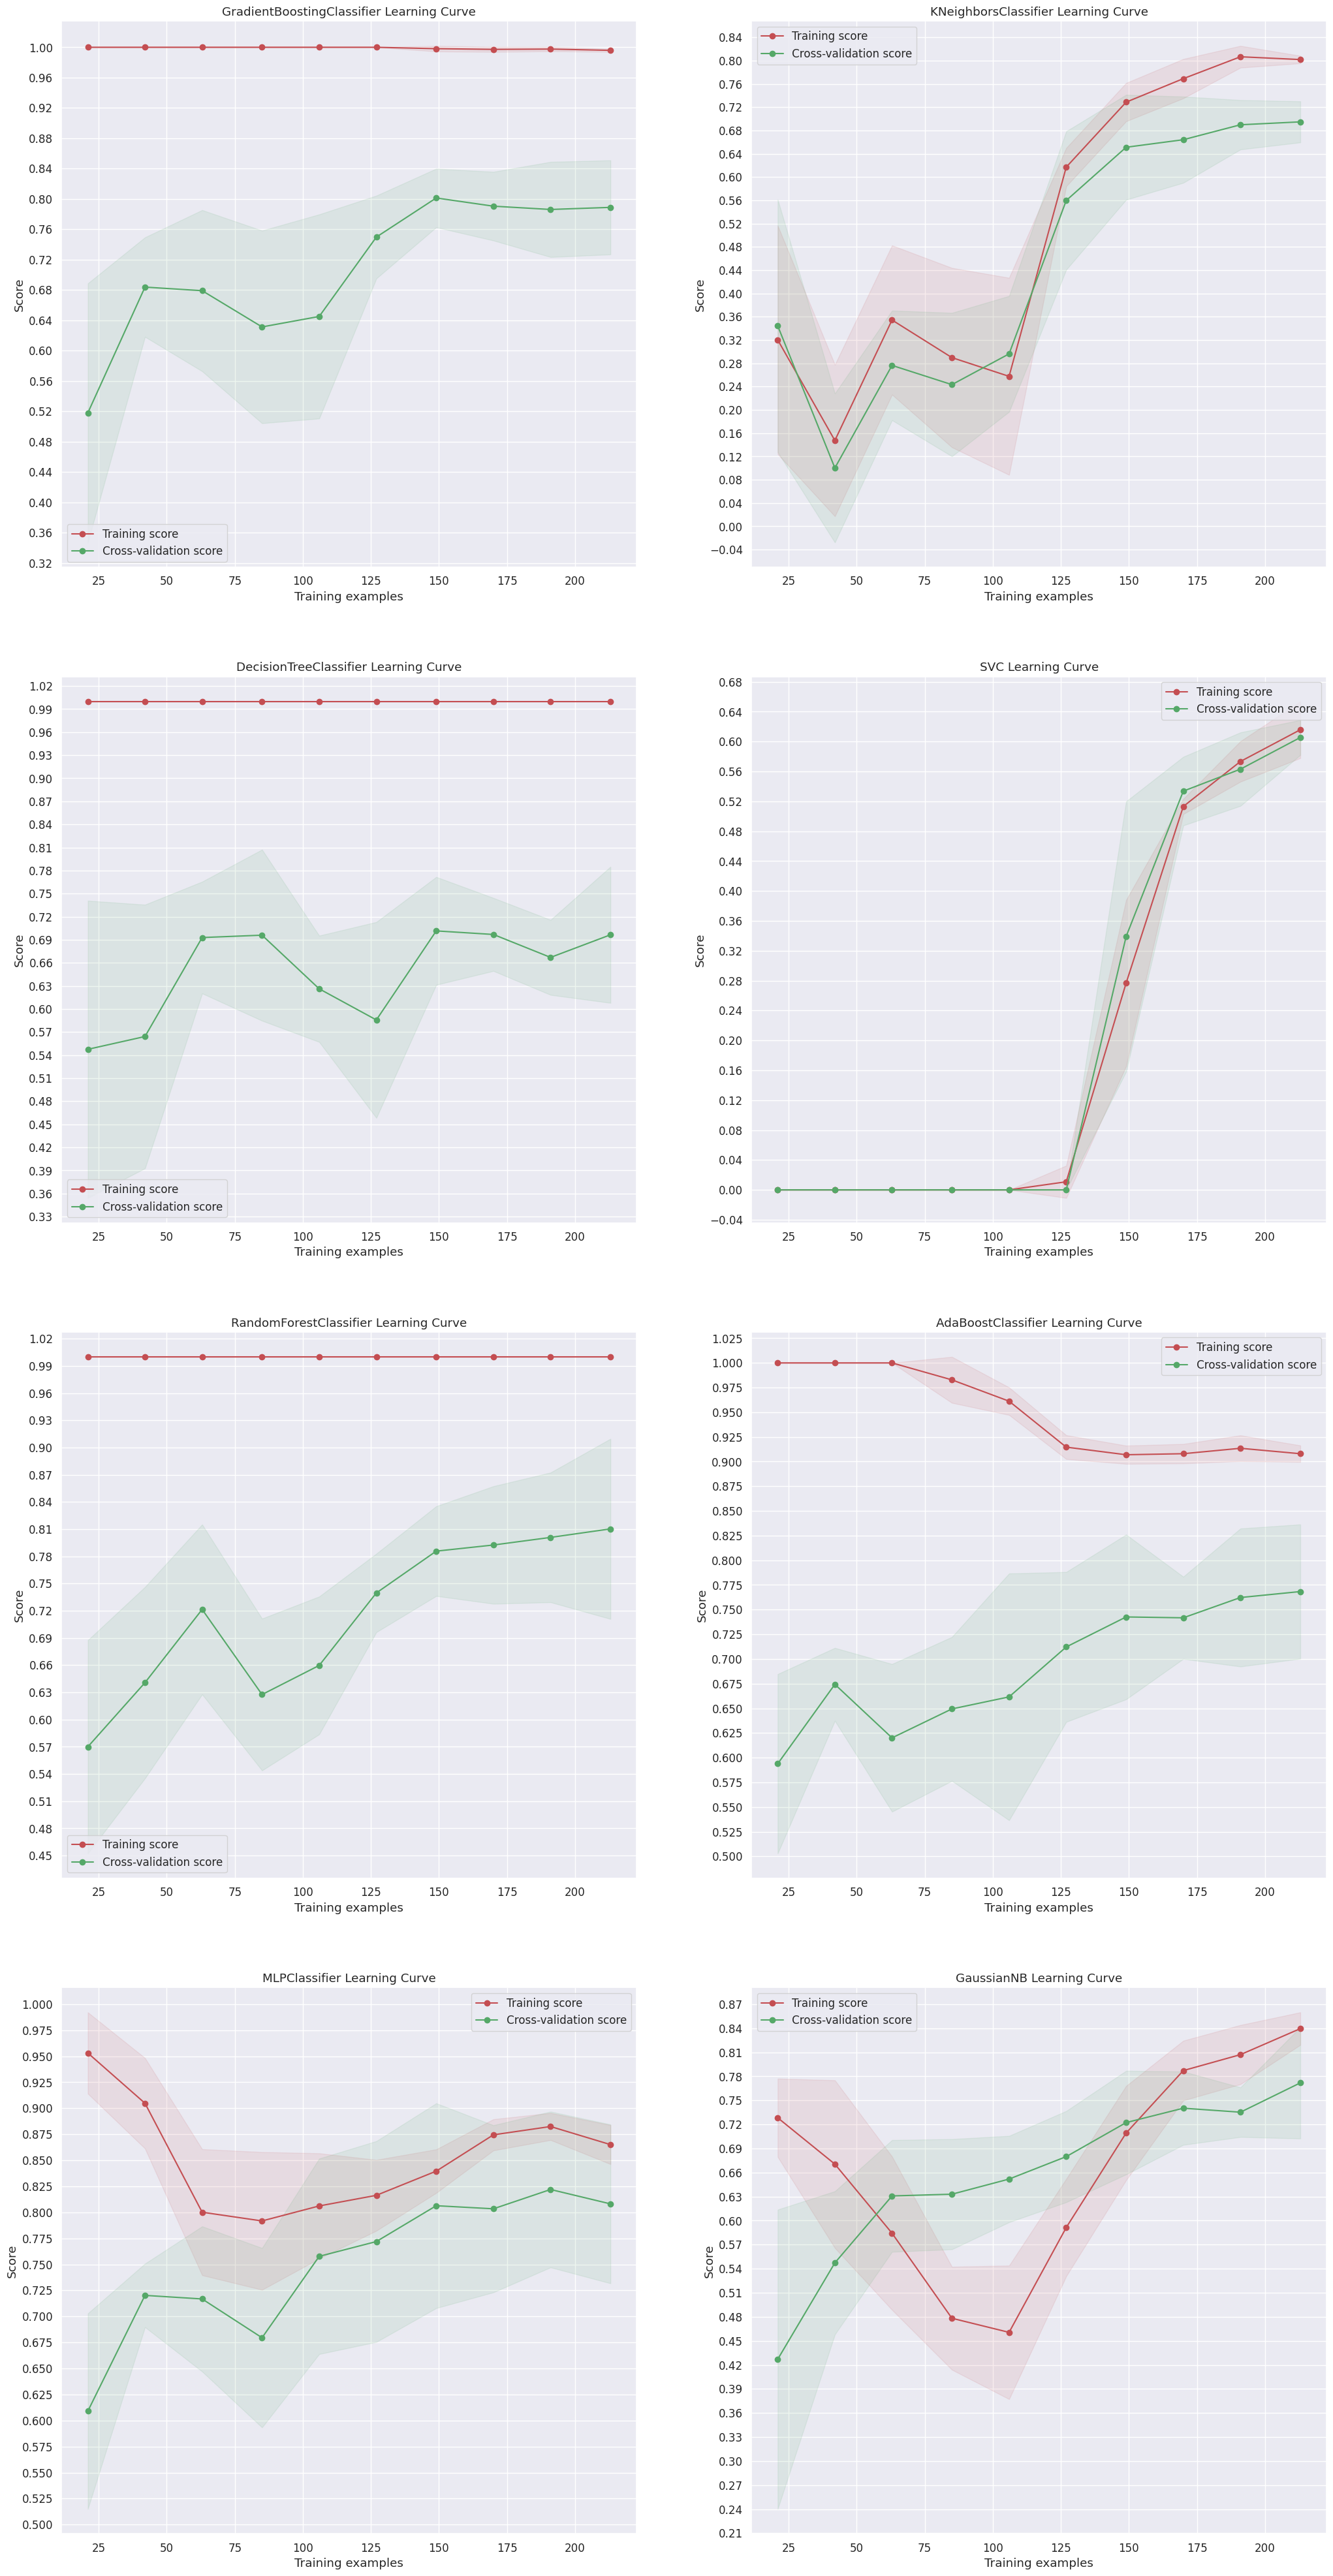

In [ ]:
# Displaying learning curves:

plot_learning_curve(classifiers,
                    X_cat,
                    y_eli,
                    ylim=None,
                    cv=cv,
                    n_jobs=-1,
                    train_sizes=np.linspace(.1, 1.0, 10))

Randomized Search CV

Let's get rid of overfitting.One of the easiest ways of doing it is tuning parameters for our estimators and regularize them. Thankfully sklearn is coming to help with useful tools for this case too! We going to use RandomizedSearchCV for the same.

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

A budget can be chosen independent of the number of parameters and possible values.

Adding parameters that do not influence the performance does not decrease efficiency.

In [ ]:
# Searching parameters for fine tuning:

for i in [randfclass,svc, adaclass]:

    if i == svc:
        parameters = {
        'C': [1,3,9,27],
        'tol': [1e-2, 1e-3, 1e-4],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'shrinking': [True, False]}

    if i == randfclass:
        parameters = {
            'max_depth': [2, 3, 5],
            'n_estimators': [50, 100, 150],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False],
        }

    if i == adaclass:
        parameters = {
            'base_estimator': [None, dectree],
            'n_estimators': [50, 100, 150],
            'algorithm': ['SAMME','SAMME.R'],
            'learning_rate': [0.8,1,1.2],
        }


    def hyperparameter_tune(base_model, parameters, n_iter, cv, X, y):

        ''' A function for optimizing mutliple classifiers'''

        start_time = time.time()
        optimal_model = RandomizedSearchCV(base_model,
                                param_distributions=parameters,
                                n_iter=n_iter,
                                cv=cv,
                                scoring = 'f1',
                                n_jobs=-1,
                                random_state=seed)

        optimal_model.fit(X, y)


        scores = cross_val_score(optimal_model, X, y, cv=cv,n_jobs=-1, scoring='f1')
        stop_time = time.time()

        print('====================')
        print(f'Updated Parameters for {str(base_model.__class__.__name__)}')
        print('Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}'.format(scores.mean(), scores.std()))
        print('Best Score: {:.3f}'.format(optimal_model.best_score_))
        print('Best Parameters: {}'.format(optimal_model.best_params_))
        print('Elapsed Time:', time.strftime('%H:%M:%S', time.gmtime(stop_time - start_time)))
        print('====================')


        return optimal_model.best_params_, optimal_model.best_score_
    best_params, best_score = hyperparameter_tune(i, parameters, 20, cv, X_cat, y_eli)
    i.set_params(**best_params)

Updated Parameters for RandomForestClassifier
Cross Val Mean: 0.831, Cross Val Stdev: 0.071
Best Score: 0.836
Best Parameters: {'n_estimators': 150, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
Elapsed Time: 00:01:38
Updated Parameters for SVC
Cross Val Mean: 0.794, Cross Val Stdev: 0.068
Best Score: 0.816
Best Parameters: {'tol': 0.01, 'shrinking': False, 'kernel': 'linear', 'C': 9}
Elapsed Time: 00:01:33
Updated Parameters for AdaBoostClassifier
Cross Val Mean: 0.711, Cross Val Stdev: 0.088
Best Score: 0.711
Best Parameters: {'n_estimators': 150, 'learning_rate': 1.2, 'base_estimator': DecisionTreeClassifier(random_state=42), 'algorithm': 'SAMME.R'}
Elapsed Time: 00:00:05


In [ ]:
# Checking binned models:

binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,0.989884,0.918547,0.020385,0.941012,0.861565,0.047791,0.934723,0.836396,0.076383,0.276146
3,SVC,0.951348,0.900510,0.027332,0.906367,0.838994,0.038366,0.895592,0.815847,0.057535,2.237602
6,MLPClassifier,0.949950,0.923717,0.022040,0.882976,0.839343,0.043654,0.868902,0.813431,0.077942,0.319758
0,GradientBoostingClassifier,0.999789,0.895894,0.015126,0.996253,0.809085,0.026946,0.995947,0.776376,0.054416,0.381357
7,GaussianNB,0.916139,0.856745,0.069132,0.843684,0.790077,0.057891,0.835720,0.776095,0.068406,0.005505
2,DecisionTreeClassifier,1.000000,0.769719,0.053370,1.000000,0.779315,0.041850,1.000000,0.736073,0.085804,0.009277
5,AdaBoostClassifier,1.000000,0.745622,0.062741,1.000000,0.753110,0.056124,1.000000,0.710519,0.087910,0.011812
1,KNeighborsClassifier,0.912502,0.805006,0.037534,0.824905,0.737666,0.032636,0.800193,0.694895,0.035317,0.008547


**Dimentionality Reduction Using PCA:**

  - PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns components in its fit method, and can be used on new data to project it on these components.

Reducing dimensions is useful for bigger datasets because by transforming a large set of variables into a smaller one that still contains most of the information in the large set makes your modelling faster. This is not the case here since we have very small data but we still can use it for visualization.

In [ ]:
# Fitting PCA:

pca = PCA()
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

**Components:**

We start with 5 components. It looks like these 5 explains half of the variance in our data.

In [ ]:
# 5 Component PCA:

pca = PCA(5)
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

In [ ]:
# Displaying 50% of the variance:

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f'PC {i+1}' for i in range(5)}
labels['color'] = 'condition'

fig = px.scatter_matrix(
    pca_samples,
    color=y_eli,
    dimensions=range(5),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    opacity=0.8,
    color_continuous_scale=cust_palt,
)
fig.update_traces(diagonal_visible=False)
fig.show()

Components:

The more we reduce the dimensions further we can visualize it better for our graphs. At 3D we can have this scatterplot, showing us some kind of meaningful clusters.

In [ ]:
# 3 Component PCA:

pca = PCA(3)  # Project from 46 to 3 dimensions.
matrix_3d = pca.fit_transform(X_cat)

In [ ]:
# Displaying 3 components:

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(x=matrix_3d[:, 0], y=matrix_3d[:, 1], z=matrix_3d[:, 2], color=y_eli, opacity=0.8,color_continuous_scale=cust_palt,
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels = {'x':'Component 1', 'y':'Component 2','z':'Component 3'})
fig.show()

# On 2D space we can still diverse the clusters according to our target variables.
# These two components explains almost one third of the variance.

In [ ]:
# 2 Component PCA:

pca = PCA(2)  # project from 46 to 2 dimensions
matrix_2d = pca.fit_transform(X_cat)

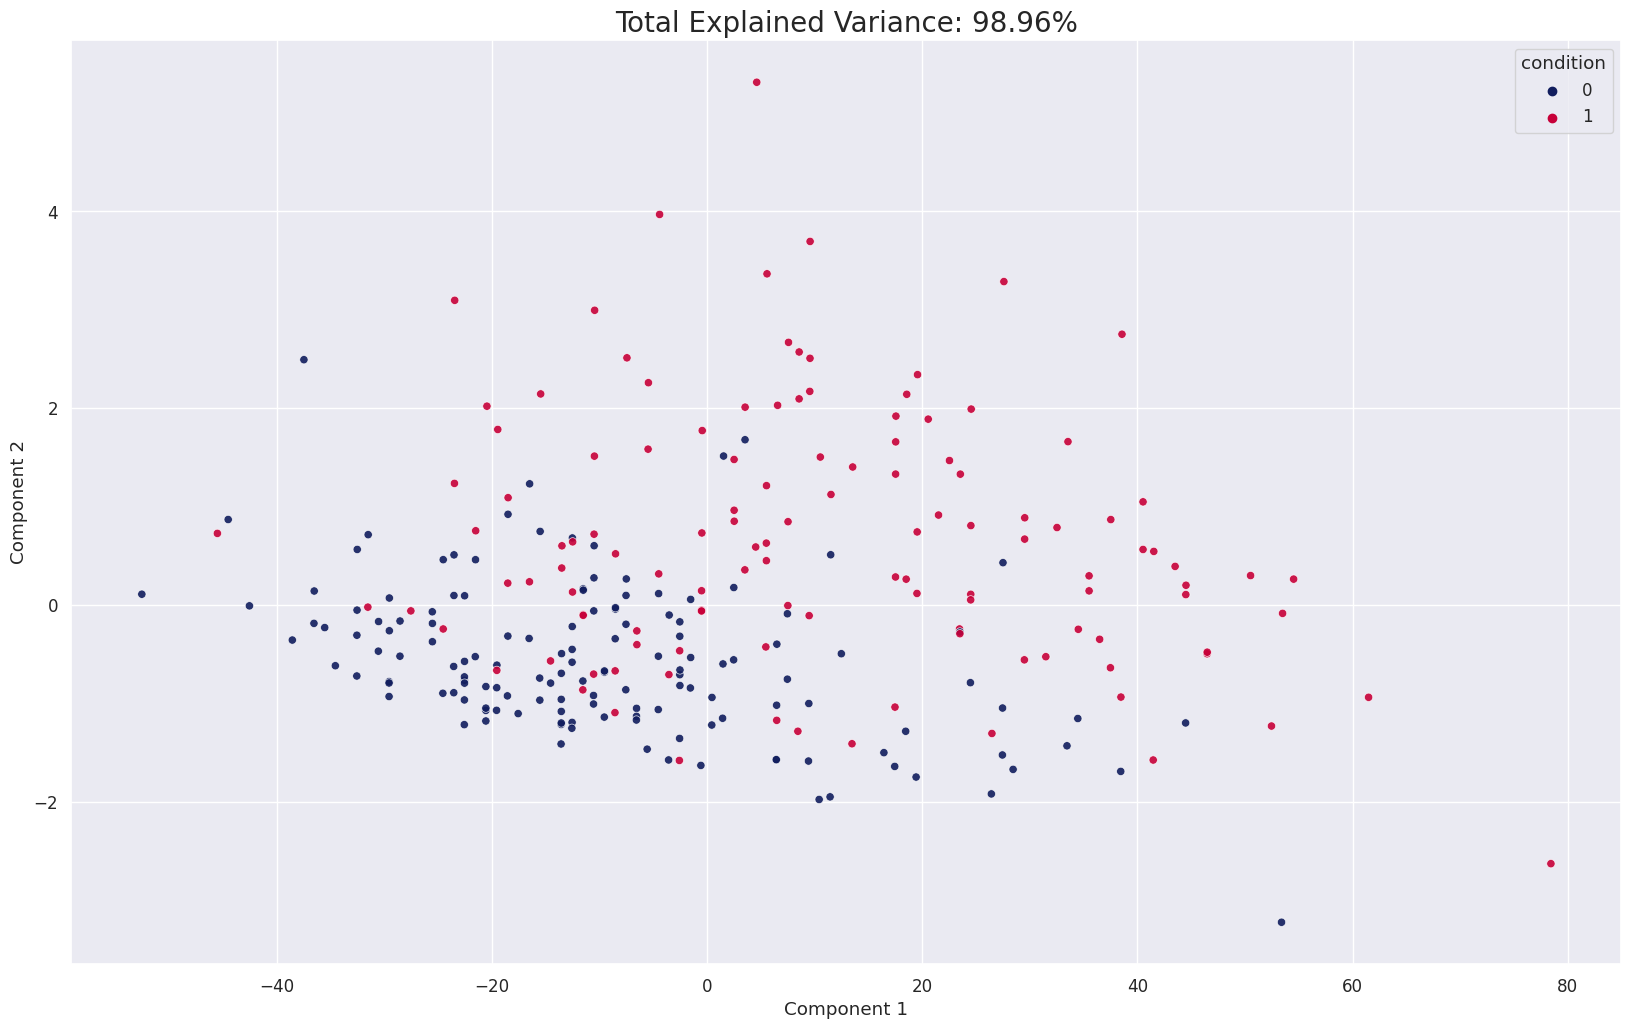

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = plt.figure(figsize=(20, 12))
ax = sns.scatterplot(x=matrix_2d[:, 0], y=matrix_2d[:, 1], palette=cust_palt[:2],
                     hue=y_eli, alpha=0.9)
ax.set_title(f'Total Explained Variance: {total_var:.2f}%', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

Reduced Dimension Model Results:

These are pretty good results! We almost have same model metrics for most of the classifiers and even got some better regularization for some estimators!

In [ ]:
# Reduced Dimension Model Results

model_check(matrix_2d, y_eli, classifiers, cv)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
3,SVC,0.890456,0.882739,0.027051,0.823040,0.816492,0.036410,0.794774,0.779861,0.067722,1.788472
6,MLPClassifier,0.885084,0.881560,0.030032,0.809899,0.816562,0.049087,0.778284,0.779278,0.083867,0.262132
7,GaussianNB,0.868344,0.865177,0.048341,0.795880,0.782530,0.060710,0.757201,0.739338,0.090139,0.001869
0,GradientBoostingClassifier,0.997668,0.798135,0.058579,0.976592,0.722851,0.064470,0.974414,0.695709,0.087849,0.363998
1,KNeighborsClassifier,0.892521,0.782912,0.060735,0.829577,0.734102,0.024667,0.802411,0.694665,0.055844,0.007409
4,RandomForestClassifier,0.977952,0.788687,0.070484,0.904519,0.734312,0.054995,0.890248,0.690615,0.098567,0.277422
5,AdaBoostClassifier,1.000000,0.707492,0.059786,1.000000,0.707757,0.064239,1.000000,0.688391,0.060910,0.005733
2,DecisionTreeClassifier,1.000000,0.700683,0.065169,1.000000,0.700140,0.068384,1.000000,0.674386,0.056785,0.015416


**Decision Regions:**

With these contour plots we can see how models decide on their predictions based on 2D data with confidence intervals. Looks cool!

In [ ]:
def prob_reg(X, y):

    ''' A function for displaying decision regions'''

    from matplotlib.colors import ListedColormap
    figure = plt.figure(figsize=(20, 40))
    h = .02
    i = 1

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#e00d14', '#3ca02c'])
    ax = plt.subplot(5, 2, i)

    # Iterate over classifiers
    for clf in classifiers:
        ax = plt.subplot(math.ceil(len(classifiers) / 2), 2, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        g = ax.scatter(X_train[:, 0],
                       X_train[:, 1],
                       c=y_train,
                       cmap=cm_bright,
                       edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c=y_test,
                   cmap=cm_bright,
                   edgecolors='k',
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        ax.set_title(clf.__class__.__name__)

        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        plt.legend(handles=g.legend_elements()[0],
                   labels=['No Disease', 'Has Disease'],
                   framealpha=0.3,
                   scatterpoints=1)

        i += 1

    plt.tight_layout()
    plt.show()

Confusion Matrix:

In [ ]:
def conf_mat(X,y, classifiers):

    ''' A function for displaying confusion matrices'''

    fig, axes = plt.subplots(4,2, figsize=(20,12))

    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):
        classifier.fit(X,y)
        plot_confusion_matrix(classifier, X, y,
                                         values_format = 'n',
                                         display_labels = ['No Disease', 'Diease'],
                                         cmap='summer_r',ax=ax)
        ax.set_title(f'{classifier.__class__.__name__}')
        ax.grid(False)
        plt.tight_layout()

In [ ]:
GBCwithKNN = [[135,9], [13,110]]
GBCwithDTC = [[134,10], [3,120]]
GBCwithSVC = [[138,6], [5,118]]
GBCwithRFC = [[135,9], [3,120]]
GBCwithABC = [[136,8], [7,116]]
GBCwithMLP = [[138,6], [9,118]]
GBCwithGNB = [[134,10], [5,118]]
DTCwithSVC = [[142,2], [3,120]]
MLPwithGNB = [[138,6], [5,118]]





<Figure size 800x600 with 0 Axes>

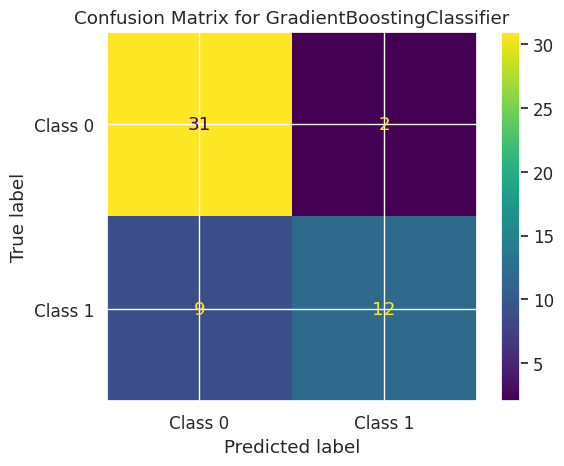

<Figure size 800x600 with 0 Axes>

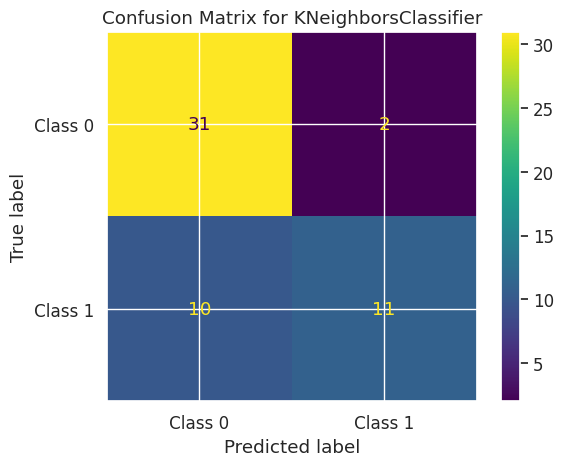

<Figure size 800x600 with 0 Axes>

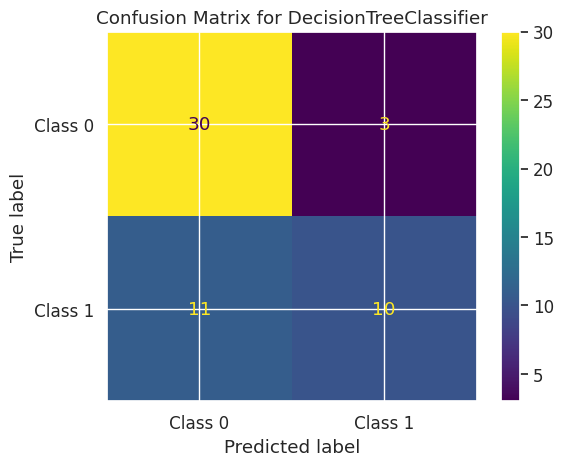

<Figure size 800x600 with 0 Axes>

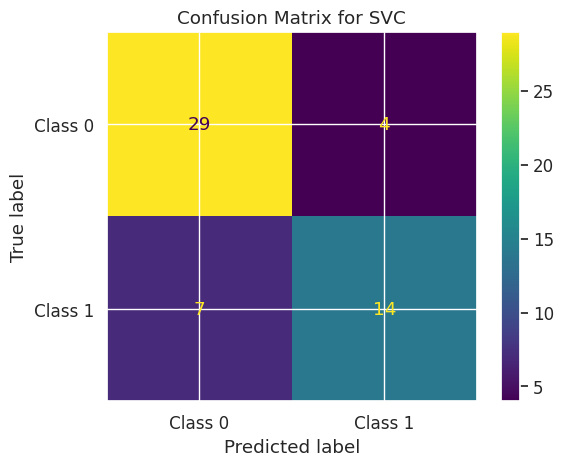

<Figure size 800x600 with 0 Axes>

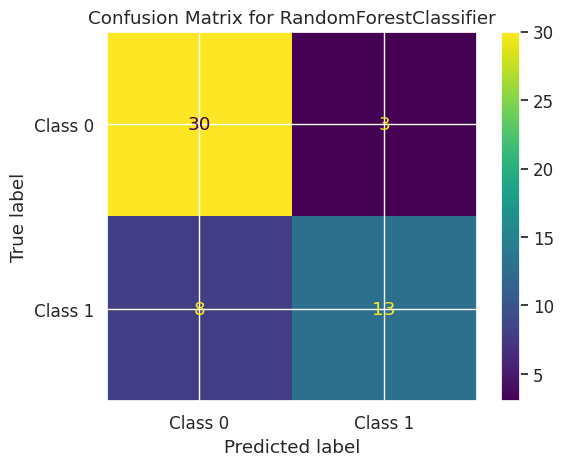

<Figure size 800x600 with 0 Axes>

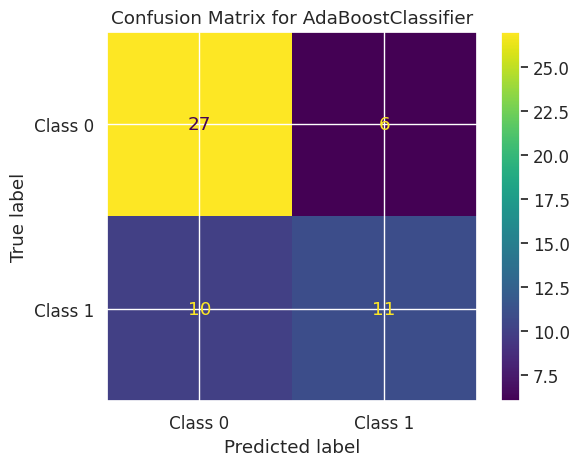

<Figure size 800x600 with 0 Axes>

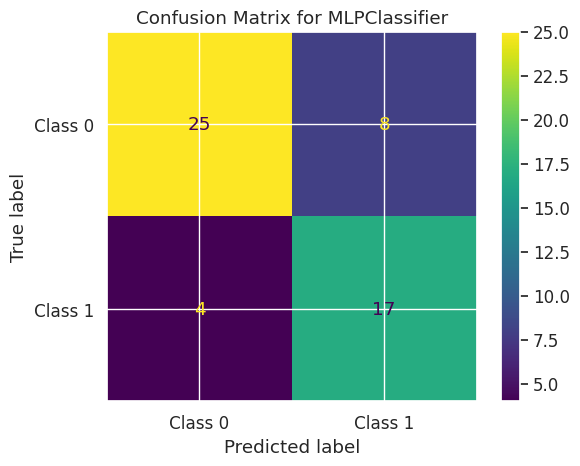

<Figure size 800x600 with 0 Axes>

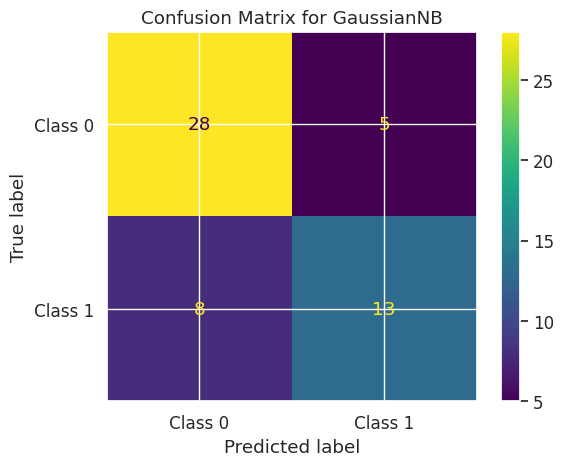

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import your classifiers here

def conf_mat(X, y, classifiers):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for classifier in classifiers:
        # Train the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict labels on the test data
        y_pred = classifier.predict(X_test)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Create a confusion matrix display object
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])  # Replace with your class labels

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        cm_display.plot(cmap='viridis')
        plt.title(f"Confusion Matrix for {type(classifier).__name__}")
        plt.show()

# Example usage:
# classifiers is a list of your classifier instances (e.g., RandomForestClassifier, LogisticRegression, etc.)
# X_cat and y_eli are your feature matrix and target variable

conf_mat(X_cat, y_eli, classifiers)


This is the END of the Visualization and Model **Building**

# Combined Ensemble Models same dataset

In [ ]:
print('\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with KNN :\n')
total=267
for x in GBCwithKNN:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithKNN[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Decision Tree Classifier :\n')
for x in GBCwithDTC:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithDTC[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with SVC :\n')
for x in GBCwithSVC:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithSVC[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Random Forest Classifier :\n')
for x in GBCwithRFC:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithRFC[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Ada Boost Classifier :\n')
for x in GBCwithABC:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithABC[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with MLP :\n')
for x in GBCwithMLP:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithMLP[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Gaussian Naive Base :\n')
for x in GBCwithGNB:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += GBCwithGNB[i][i]
result=result/total
print('Accuracy = ',result)
print('\n\nConvolution Matrix :Decision Tree Hyperparameter Tuning with SVC :\n')
for x in DTCwithSVC:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += DTCwithSVC[i][i]
result=result/total
print('Accuracy = ',result)
print("\n Its Highest among all the Hybrid methods\n")
print('\n\nConvolution Matrix :MLP Hyperparameter Tuning with Gaussian Naive Base :\n')
for x in MLPwithGNB:
  for i in x:
    print(i, end = " ")
  print()
result=0
for i in range(2):
       result += MLPwithGNB[i][i]
result=result/total
print('Accuracy = ',result)



Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with KNN :

135 9 
13 110 
Accuracy =  0.9176029962546817


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Decision Tree Classifier :

134 10 
3 120 
Accuracy =  0.951310861423221


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with SVC :

138 6 
5 118 
Accuracy =  0.9588014981273408


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Random Forest Classifier :

135 9 
3 120 
Accuracy =  0.9550561797752809


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Ada Boost Classifier :

136 8 
7 116 
Accuracy =  0.9438202247191011


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with MLP :

138 6 
9 118 
Accuracy =  0.9588014981273408


Convolution Matrix :Gradiantboost Classifier Hyperparameter Tuning with Gaussian Naive Base :

134 10 
5 118 
Accuracy =  0.9438202247191011


Convolution Matrix :Decision Tree Hyperp